In [50]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from scipy.stats import linregress

# File to Load
housing_data_to_load = "Housing prices for US.csv"
index_data_to_load = "SPX_Prices_30yr_SPXFirstOfMonth.csv"

# Read the files
housing_data = pd.read_csv(housing_data_to_load)
index_data = pd.read_csv(index_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(index_data, housing_data, on="DATE")

spx_change = combined_data["PX_LAST"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["SPX Change"] = spx_change - spx_change.mean()

re_change = combined_data["MSPUS"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["RE Change"] = re_change - re_change.mean()


window = combined_data.iloc[100:175]
window

,Ticker,DATE,PX_LAST,PX_VOLUME,Sector,MSPUS,SPX Change,RE Change
100,SPX Index ...,1/1/2009,903.25,2.455948e+10,All,208400,-0.249122,-0.074175
101,SPX Index ...,4/1/2009,797.87,3.505851e+10,All,220900,-0.140208,0.049177
102,SPX Index ...,7/1/2009,919.32,2.423769e+10,All,214300,0.128678,-0.040682
103,SPX Index ...,10/1/2009,1057.08,2.467862e+10,All,219000,0.126310,0.011128
104,SPX Index ...,1/1/2010,1115.10,2.055162e+10,All,222900,0.031347,0.007004
105,SPX Index ...,4/1/2010,1169.43,2.118151e+10,All,219500,0.025182,-0.026058
106,SPX Index ...,7/1/2010,1030.71,2.439816e+10,All,224100,-0.142162,0.010153
107,SPX Index ...,10/1/2010,1141.20,1.810202e+10,All,224300,0.083658,-0.009912
108,SPX Index ...,1/1/2011,1257.64,1.614498e+10,All,226900,0.078493,0.000788
109,SPX Index ...,4/1/2011,1325.83,1.903240e+10,All,228100,0.030680,-0.005515


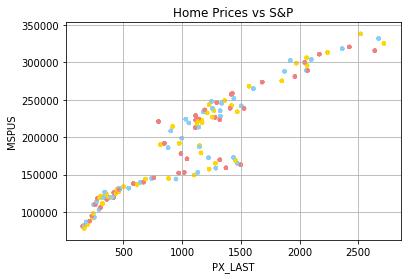

In [21]:
# Scatter plot, similar to matplotlib homeworks
# Obtain the x and y coordinates
x="PX_LAST"
y="MSPUS"
mycolors = ["gold", "lightskyblue", "lightcoral"]

fig, ax = plt.subplots()

for i, (Sector) in enumerate(combined_data):
    combined_data.plot.scatter(x, y, s=10, color=mycolors, grid=True, ax=ax, title="Home Prices vs S&P")

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

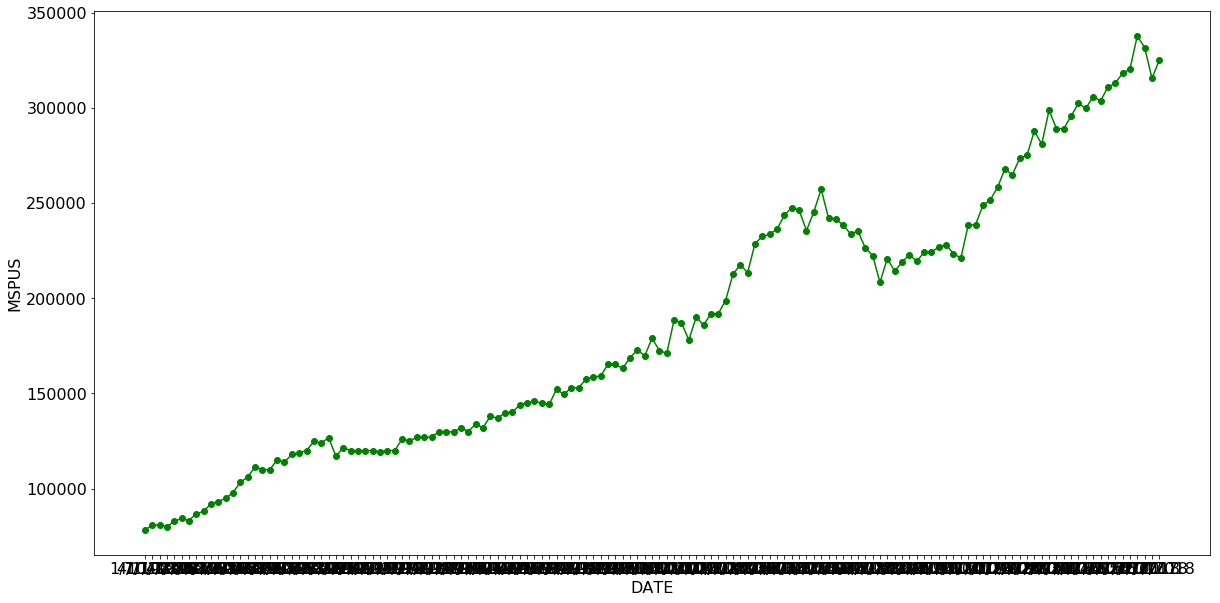

In [22]:
# plot graph of housing prices

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("DATE")
ax1.set_ylabel(y)

data1 = combined_data["MSPUS"]
x_axis1 = combined_data["DATE"]

cost_trend = plt.plot(x_axis1,data1,color='g',marker = "o")

plt.show


In [23]:
#plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
#plt.ylim(0, 1000)
#plt.xlim(0, 350000)

#plt.title("Home Prices vs S&P 500")
#plt.xlabel("Average Home Prices")
#plt.ylabel("DATE")

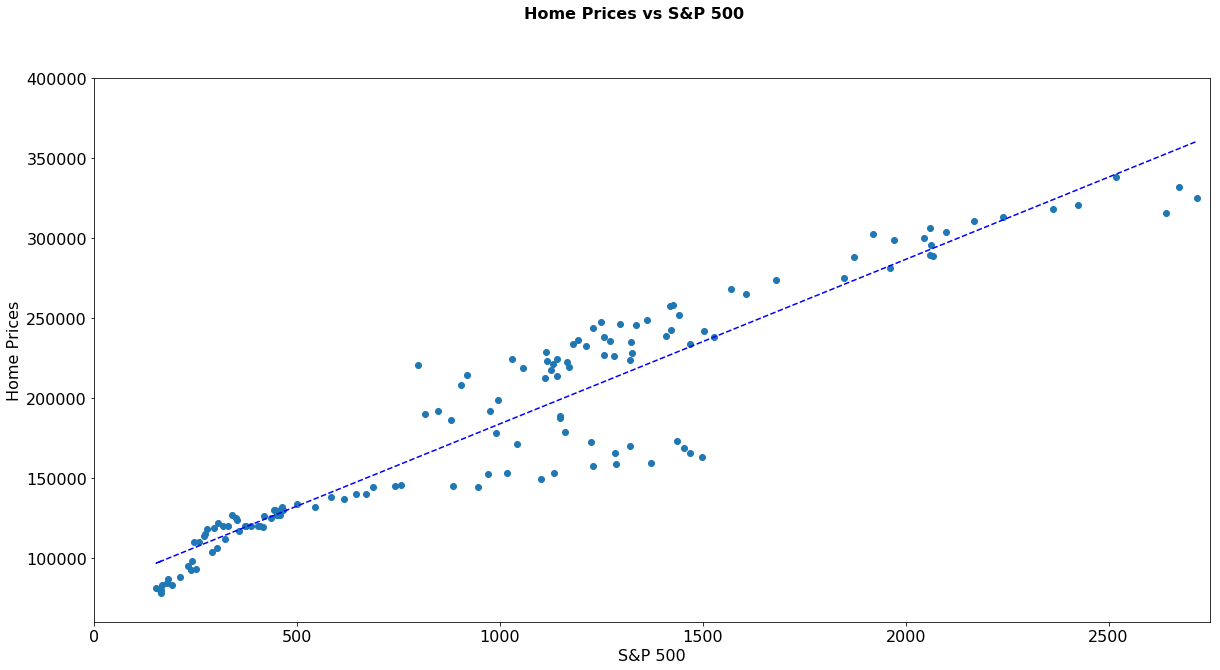

In [24]:
# 05-Matplotlib/Classwork/3/Activities/09-Ins_Fits_and_Regression/Solved

# Set data
x_axis = combined_data["PX_LAST"]
y_axis = combined_data["MSPUS"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs S&P 500", fontsize=16, fontweight="bold")

ax.set_xlim(0, 2750)
ax.set_ylim(60000, 400000)

ax.set_xlabel("S&P 500")
ax.set_ylabel("Home Prices")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')



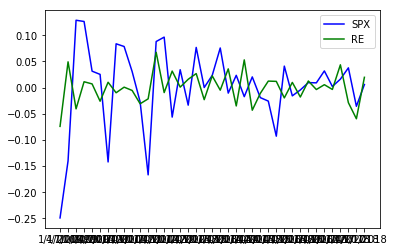

In [51]:
spx = window["SPX Change"]
re_prices = window["RE Change"]

#05-Matplotlib/Classwork/2/Activities/07-Ins_PandasMultiLine/Solved/unemploy_chart.ipynb
#Collect the years where data was collected
dates = window["DATE"]

#Plot the world average as a line chart
spx, = plt.plot(dates, spx, color="blue", label="SPX" )

#Plot the unemployment values for a single country
realestate, = plt.plot(dates, re_prices, color="green",label="RE")

#Create a legend for our chart
plt.legend(handles=[spx, realestate], loc="best")

#Show the chart
plt.show()